In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

In [83]:
crime = pd.read_csv('Crimes_2018_Modified.csv')
housing = pd.read_csv('Housing_Modified.csv')


In [87]:
ch = pd.merge(crime, housing, on = 'Community_Area_Number')
ch.head(10)
ch['Community_Area_Number']= ch['Community_Area_Number'].astype('int64', copy=False)
ch.Community_Area_Number.dtype

dtype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A709C97E10>]],
      dtype=object)

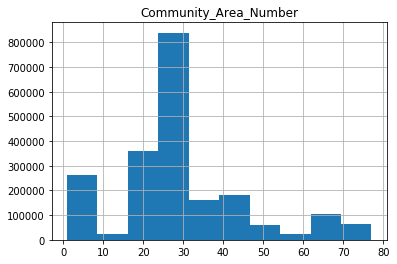

In [88]:
ch.hist(column = 'Community_Area_Number')

Community_Area_Number
1      15248
2      17605
3      58224
4       3868
5       2652
6      35646
8     130560
10      1172
11      1098
13      3000
Name: ID, dtype: int64

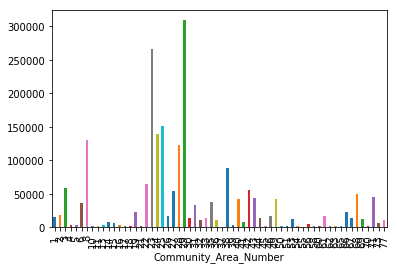

In [92]:
ch_details = ch.groupby('Community_Area_Number')['ID'].count()
#ch_details = ch['Community_Area_Number'].value_counts()
ch_details.plot(kind='bar')
ch_details.head(10)

In [93]:
ch_details = ch_details.to_frame().reset_index()
#ch_details = ch_details.rename(columns= {'ID': 'Crime_Incidents' })
#ch_details = ch_details.rename(columns= {'index': 'Community_Area_Number'})
#ch_details = ch_details.Community_Area_Number.astype('str', copy=False)
ch_details.head()

,Community_Area_Number,ID
0,1,15248
1,2,17605
2,3,58224
3,4,3868
4,5,2652


In [94]:
ch_details = ch_details.rename(columns= {'ID': 'Crime_Incidents' })
#ch_details = ch_details.rename(columns= {'index': 'Community_Area_Number'})
#ch_details = ch_details.Community_Area_Number.astype('str', copy=False)
ch_details.head()

,Community_Area_Number,Crime_Incidents
0,1,15248
1,2,17605
2,3,58224
3,4,3868
4,5,2652


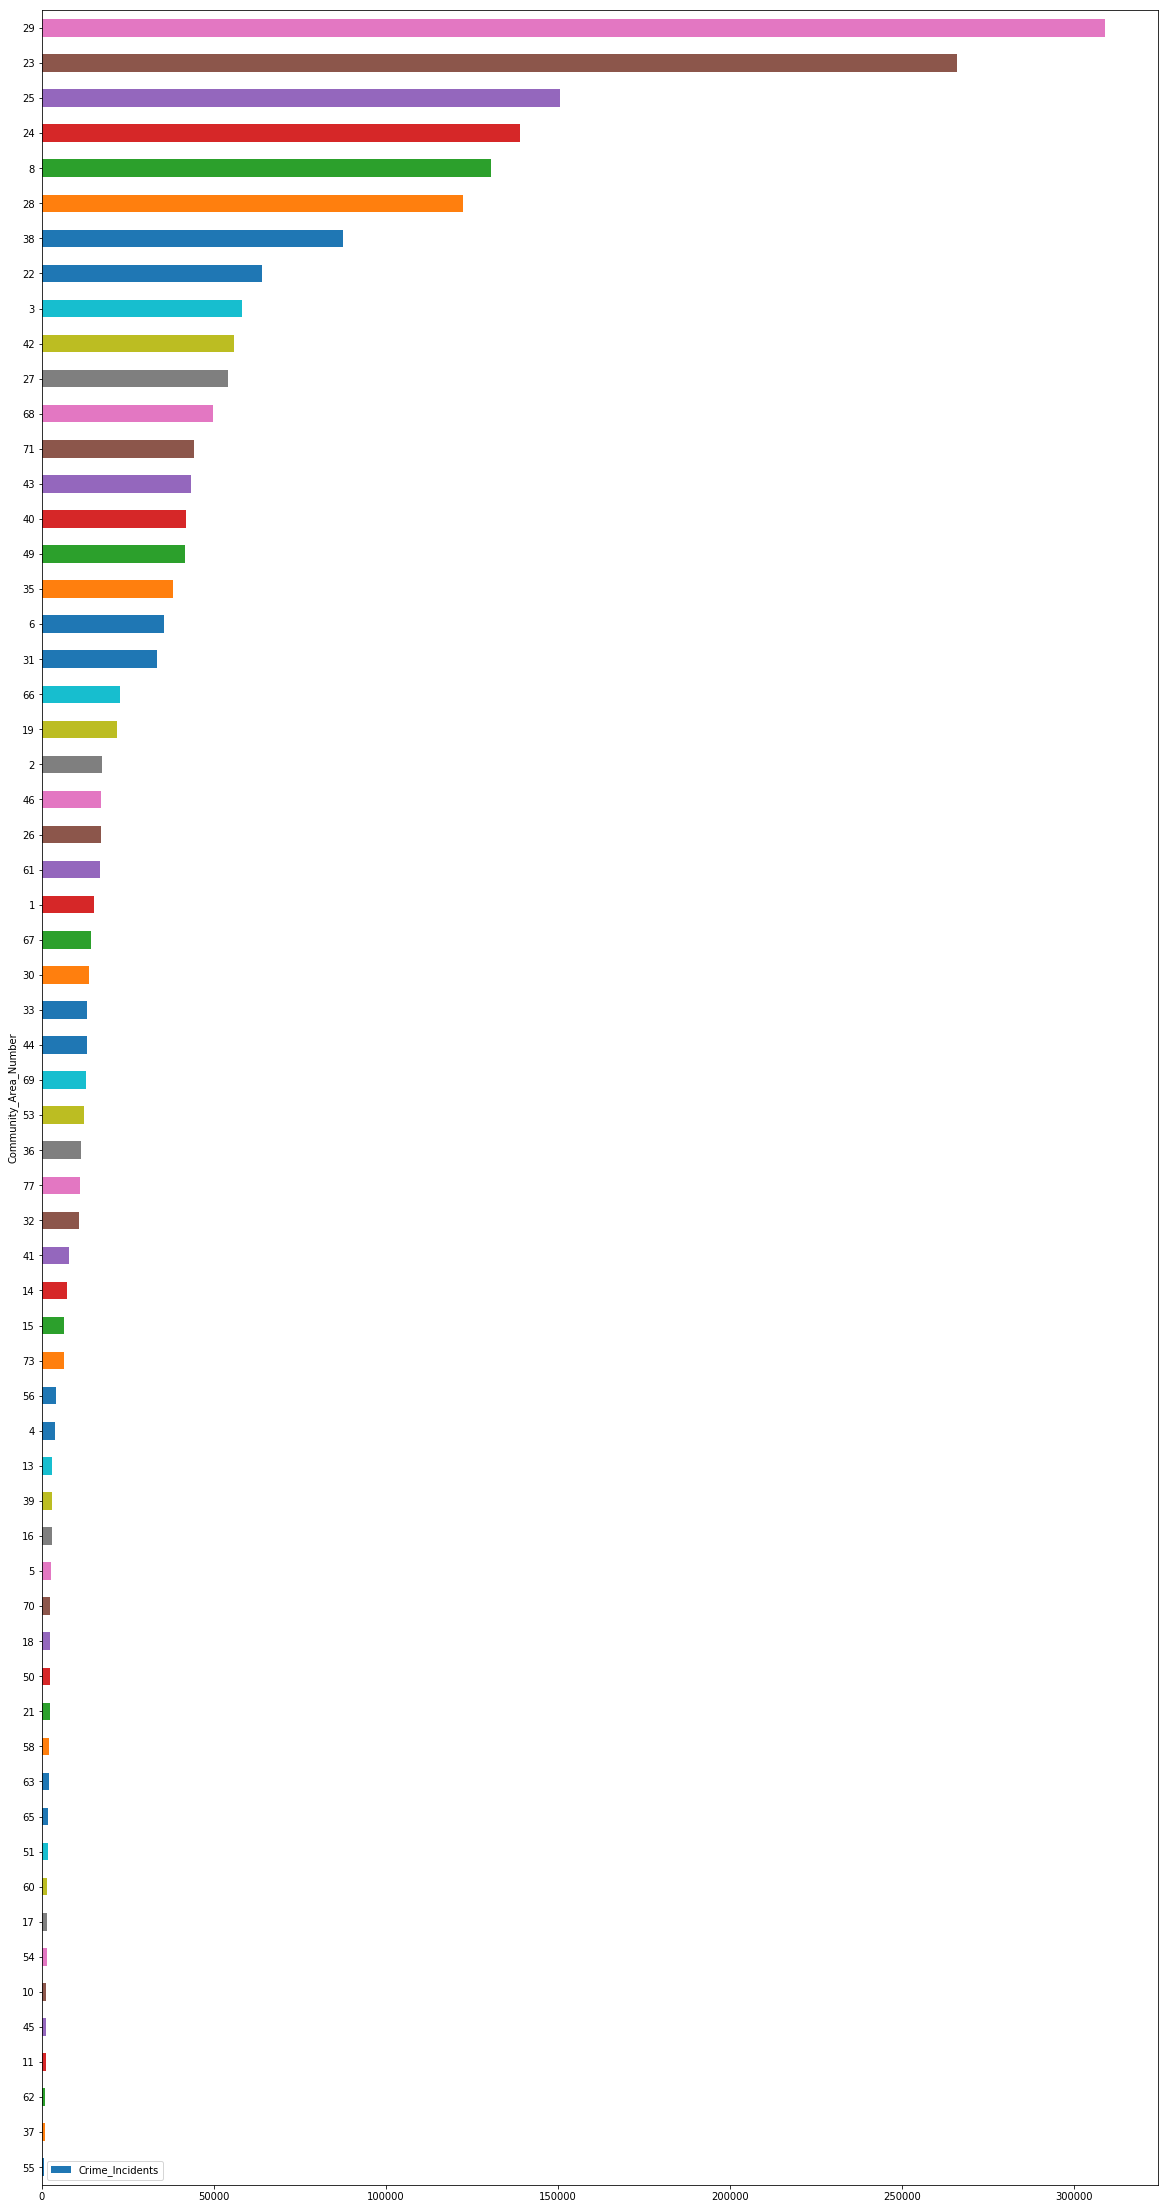

In [96]:
ch_details = ch_details.sort_values('Crime_Incidents')
ch_details.plot.barh(x='Community_Area_Number', y='Crime_Incidents', figsize = (20,40))

In [97]:
ch_details.head(10)

,Community_Area_Number,Crime_Incidents
46,55,622
31,37,837
51,62,1014
8,11,1098
39,45,1162
7,10,1172
45,54,1359
13,17,1504
49,60,1514
43,51,1747


In [98]:
ch_details1 = housing.groupby('Community_Area_Number')['Units'].sum()


In [99]:
ch_details1 = ch_details1.to_frame().reset_index()
#ch_details = ch_details.rename(columns= {'Community_Area_Number': 'Crime_Incidents' })
#ch_details = ch_details.rename(columns= {'index': 'Community_Area_Number'})
#ch_details = ch_details.Community_Area_Number.astype('str', copy=False)
ch_details1.head(10)

,Community_Area_Number,Units
0,1,517
1,2,310
2,3,1042
3,4,17
4,5,62
5,6,290
6,8,682
7,10,84
8,11,73
9,13,380


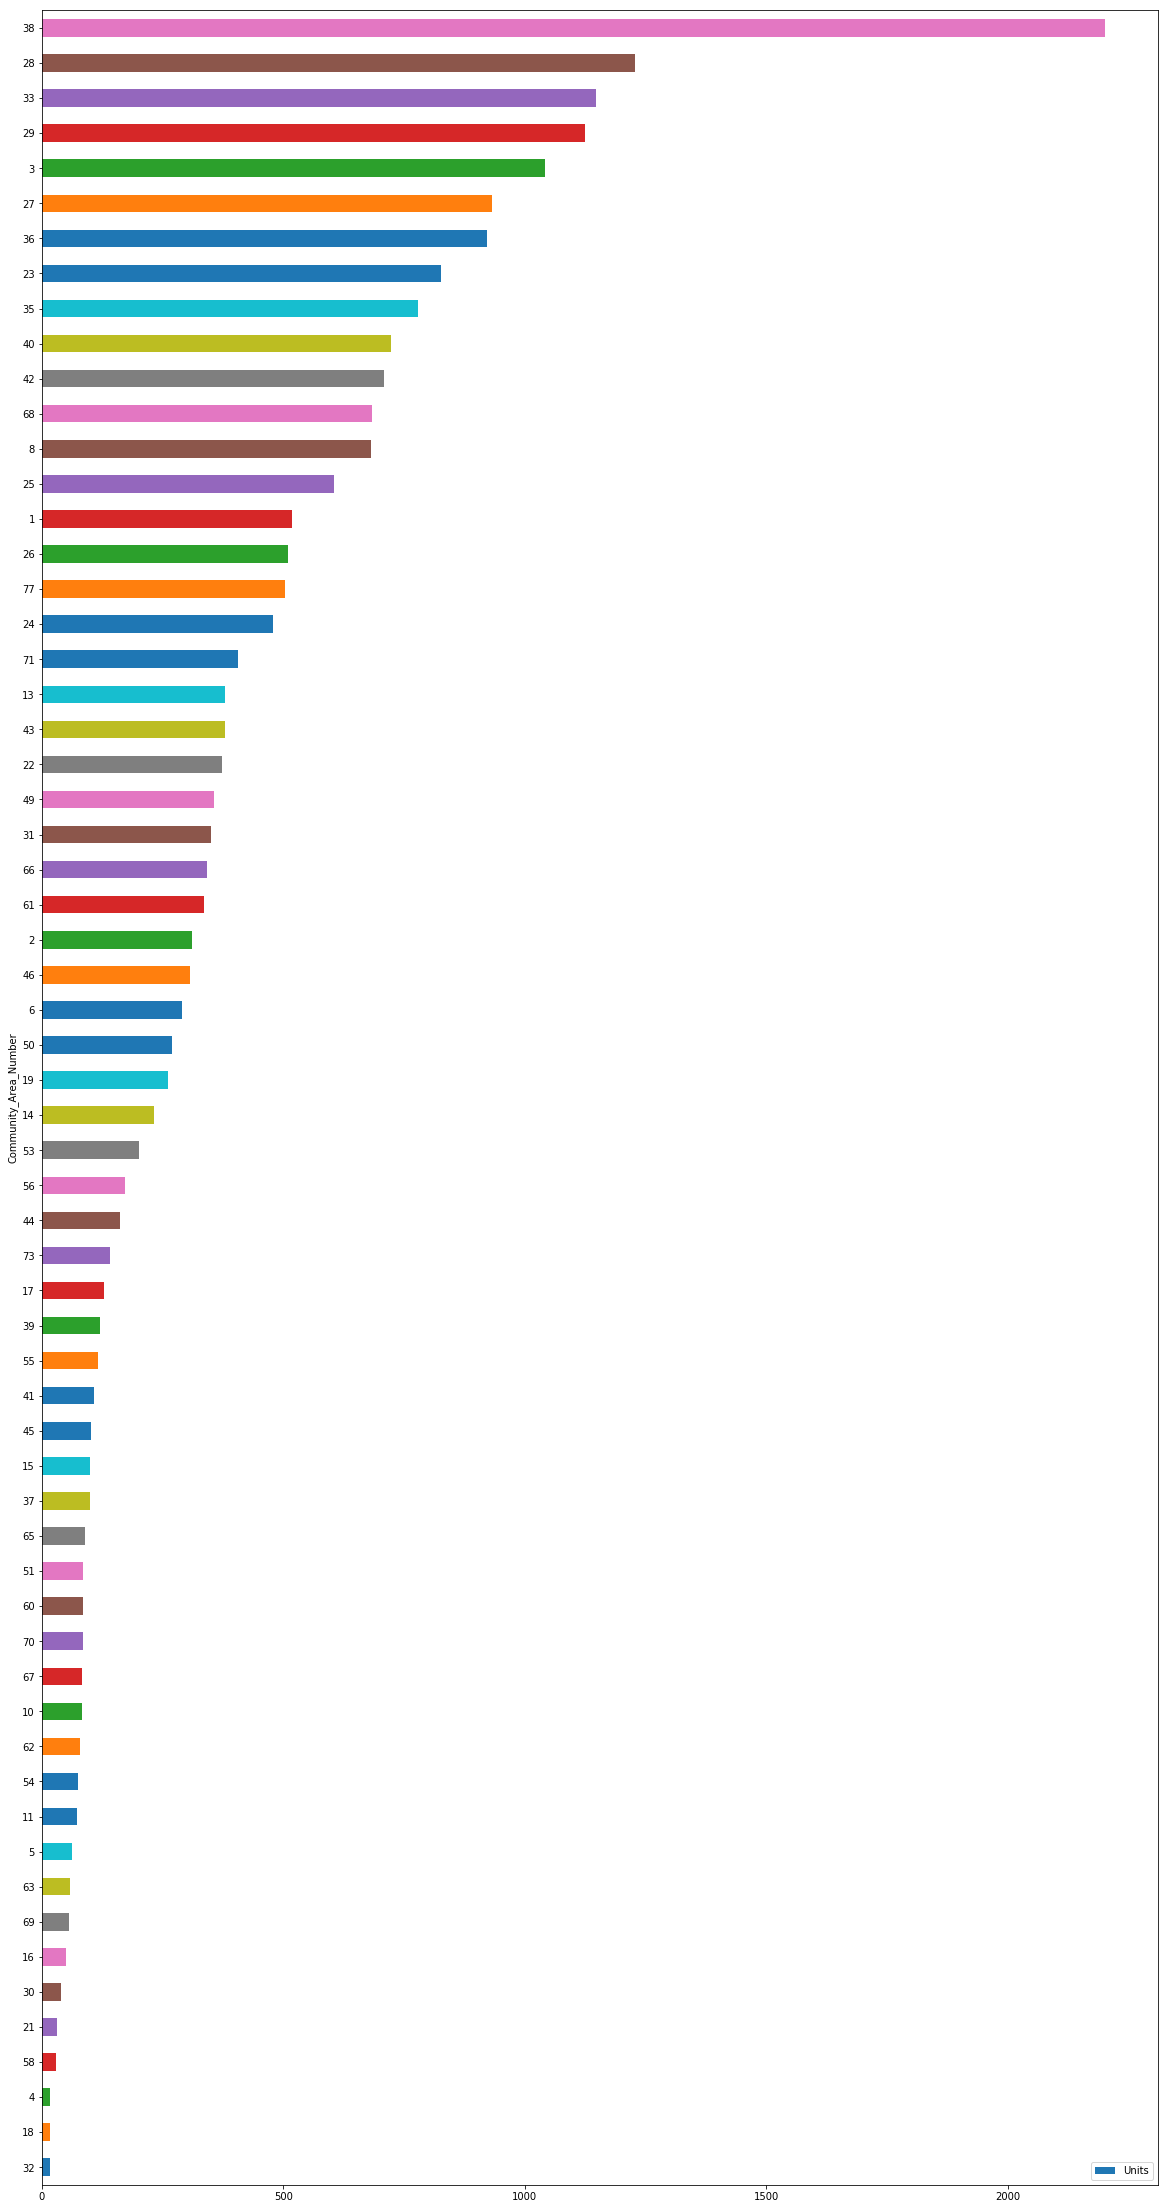

In [100]:
ch_details1 = ch_details1.sort_values('Units')
ch_details1.plot.barh(x='Community_Area_Number', y='Units', figsize = (20,40))

In [101]:
ch_combined = pd.merge(ch_details, ch_details1, on = 'Community_Area_Number')

In [102]:
ch_combined.head(10)

,Community_Area_Number,Crime_Incidents,Units
0,55,622,116
1,37,837,100
2,62,1014,78
3,11,1098,73
4,45,1162,102
5,10,1172,84
6,54,1359,75
7,17,1504,129
8,60,1514,85
9,51,1747,86


In [108]:
ch_combined['Community_Area_Number']= ch_combined['Community_Area_Number'].astype('str', copy=False)
correlation = ch_combined.corr()

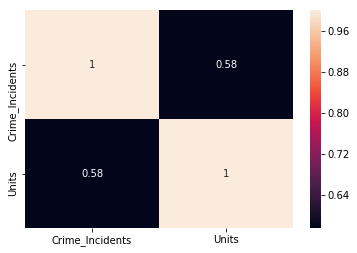

In [109]:
sns.heatmap(correlation, annot=True)

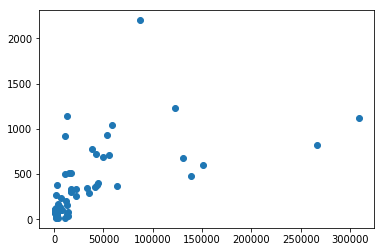

In [110]:
plt.scatter(ch_combined.Crime_Incidents, ch_combined.Units)

In [111]:
#K-Means Clustering
from sklearn.cluster import KMeans

[[1.59221091e+04 2.84236364e+02]
 [1.26049000e+05 1.03860000e+03]
 [2.87562000e+05 9.76000000e+02]]


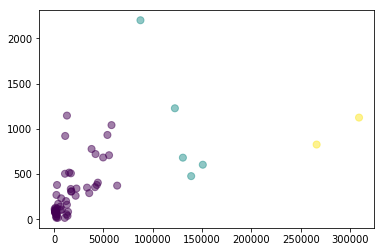

In [126]:
kmeans = KMeans(n_clusters=3).fit(ch_combined[['Crime_Incidents','Units']])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(ch_combined['Crime_Incidents'], ch_combined['Units'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

In [144]:
labels = kmeans.labels_
#dataset = pd.DataFrame({'Column1':data[:,0],'Column2':data[:,1]})
labels1 = pd.DataFrame({'Cluster': labels})

labels1

,Cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [152]:
final = pd.concat([ch_combined.reset_index(drop=True),labels1.reset_index(drop=True)], axis=1)
final

,Community_Area_Number,Crime_Incidents,Units,Cluster
0,55,622,116,0
1,37,837,100,0
2,62,1014,78,0
3,11,1098,73,0
4,45,1162,102,0
5,10,1172,84,0
6,54,1359,75,0
7,17,1504,129,0
8,60,1514,85,0
9,51,1747,86,0


In [153]:
final.to_excel(r'D:\Downloads\S7388\final_output.xlsx')